In [1]:
#import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['target'] = housing.target

print('View first 5 rows')
print(df.head())

'''Source: https://scikit-learn.org/dev/modules/generated/sklearn.datasets.fetch_california_housing.html'''

'''### Questions? ###
Post on the course discussion board or email the instructor at aalmalki@gmu.edu'''

View first 5 rows
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


'### Questions? ###\nPost on the course discussion board or email the instructor at aalmalki@gmu.edu'

In [3]:
#begin preprocessing

#get shape and column information

#rename target feature to price
df['PRICE'] = housing.target
df.drop('target', axis=1, inplace=True) if 'target' in df.columns else None

#shape
print(f'Df shape is {df.shape}') #20640 rows, 9 features. Target seems to be the price that we should predict to.

#column information
print("\nColumn information:", df.info())

Df shape is (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Column information: None


In [4]:
#step 2: clean data
'''
-check missing values
-check duplicates
-check outliers
'''

print("\nMissing values in each column:")
print(df.isnull().sum())

print("\nDuplicate rows in the dataset:", df.duplicated().sum())

print("\nBasic statistics of numerical columns:")
print(df.describe())

from scipy import stats
num_cols = df.select_dtypes(include=[np.float64, np.int64]).columns #get numerical cols

#find outliers of numerical columns
for col in num_cols:
  z = np.abs(stats.zscore(df[col]))
  outlier_ndx = np.where(z > 3)
  print("\nNumber of outliers in", col, ":", len(outlier_ndx[0]))


Missing values in each column:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Duplicate rows in the dataset: 0

Basic statistics of numerical columns:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      

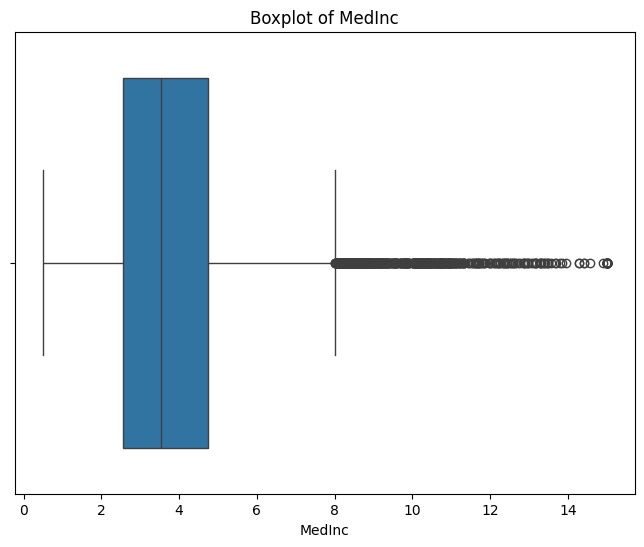

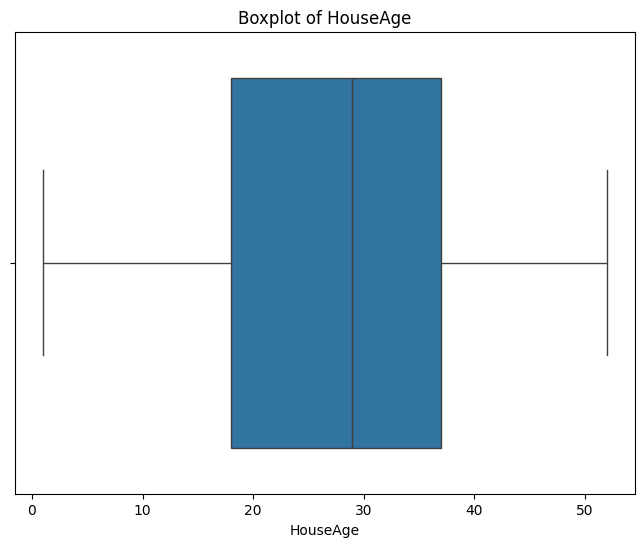

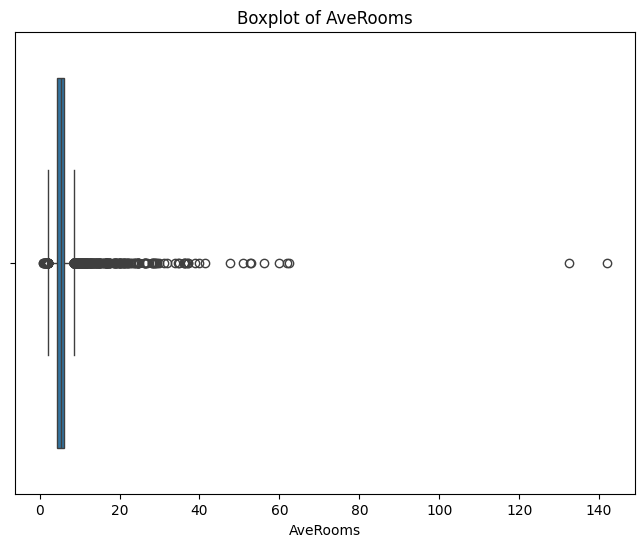

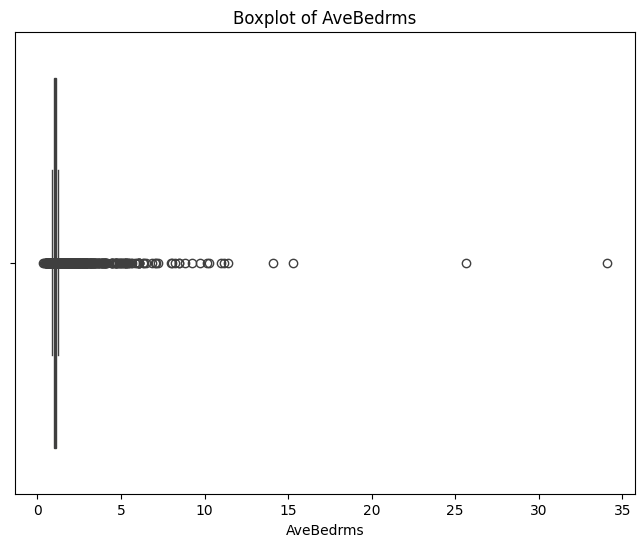

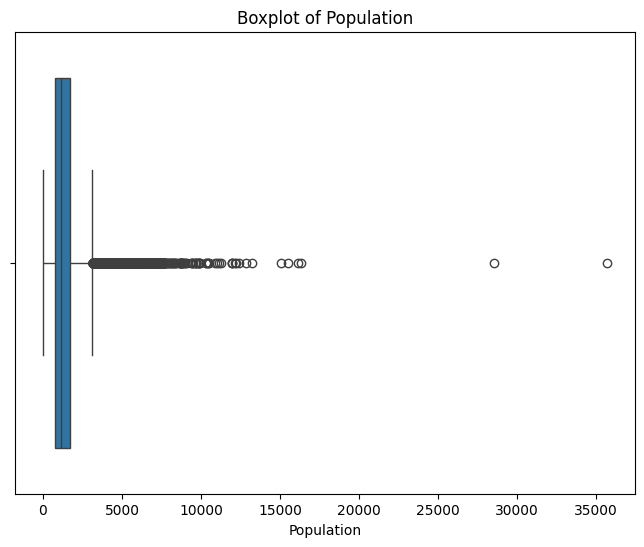

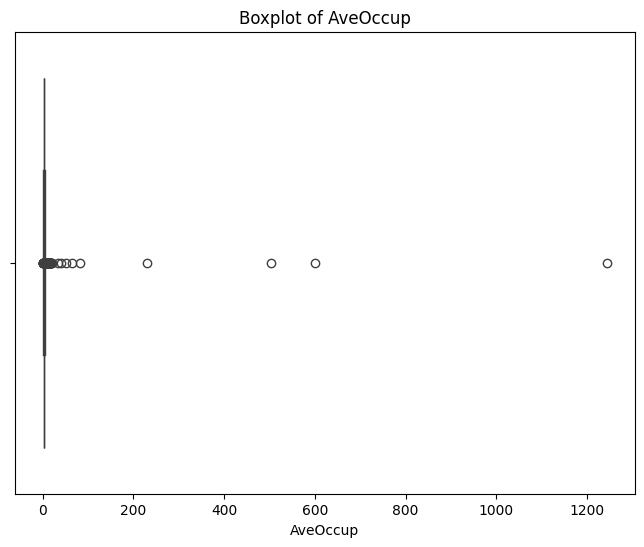

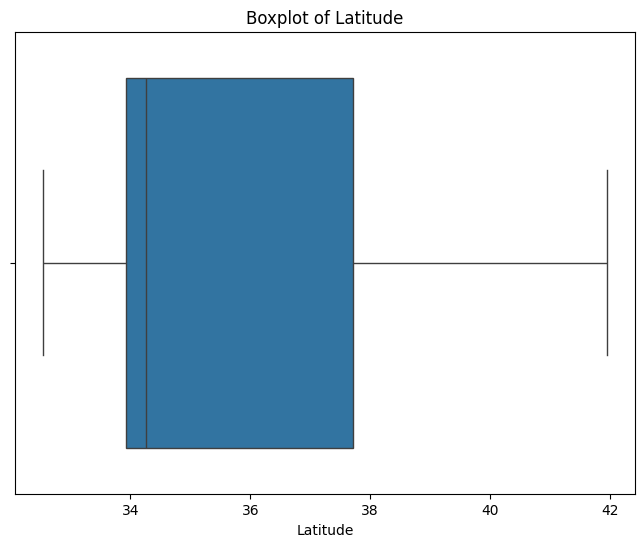

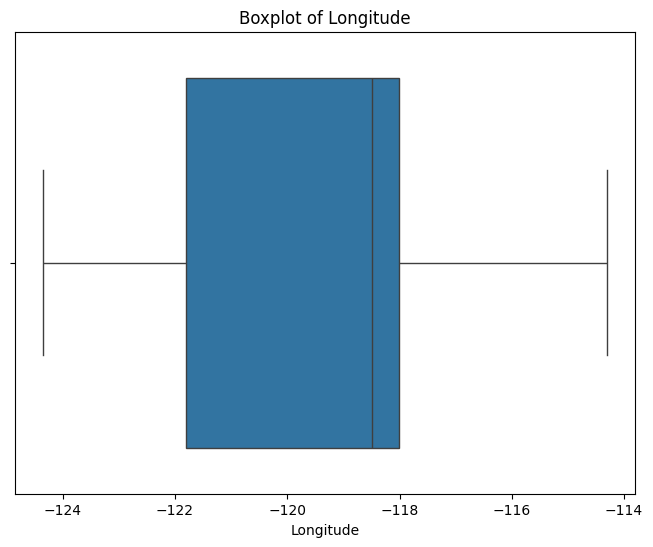

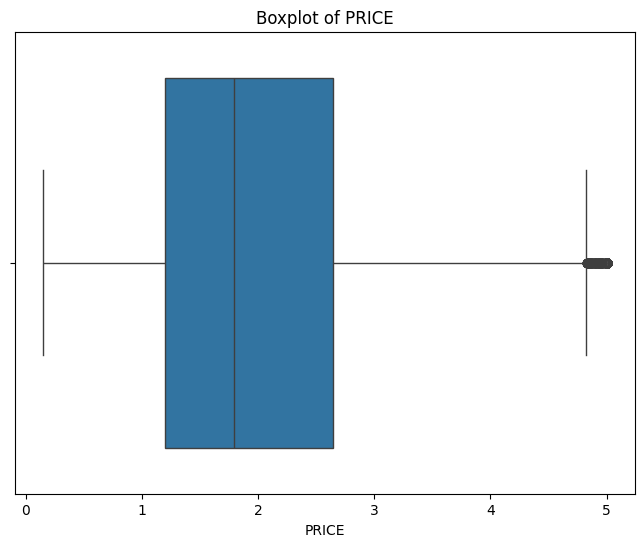

In [5]:
#plot boxplots of numerical features to visualize outliers

for col in num_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

It seems averooms, avebedrms, population, and aveoccup have quite significant outliers.

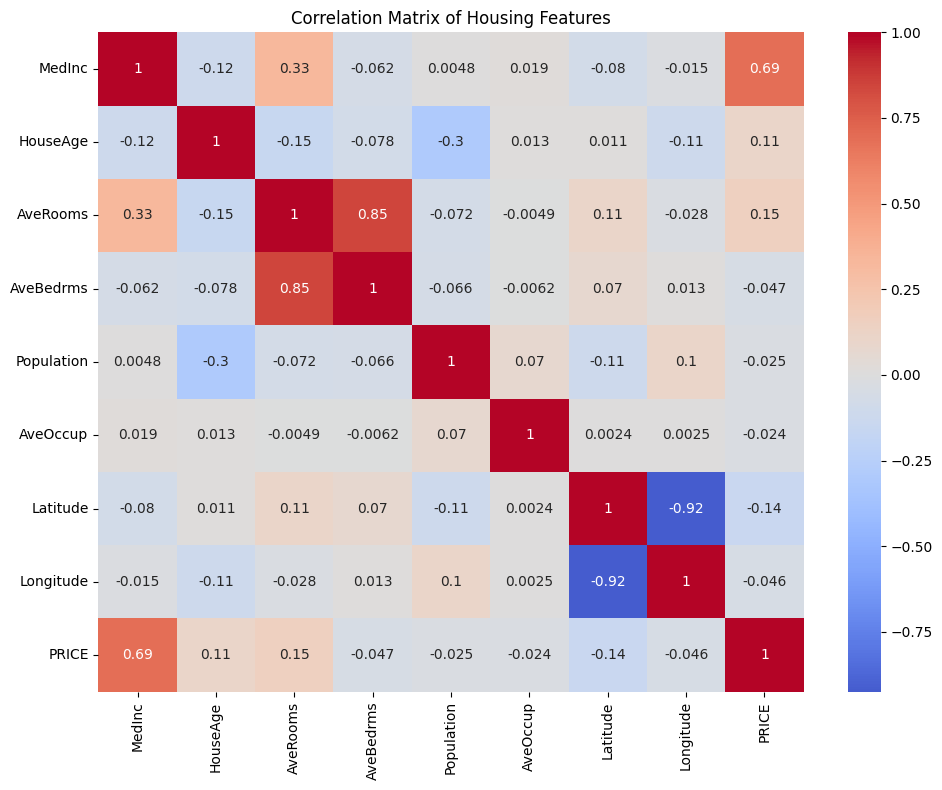

In [6]:
#step 3 EDA

# Create a correlation matrix
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Housing Features')
plt.tight_layout()
plt.show()

In [7]:
#find features most correlated with Price

price_corrl = (correlation_matrix['PRICE'].sort_values(ascending=False))

threshold = 0.1 #threshold for comparison

print(abs(price_corrl) > threshold)
print(price_corrl)

PRICE          True
MedInc         True
AveRooms       True
HouseAge       True
AveOccup      False
Population    False
Longitude     False
AveBedrms     False
Latitude       True
Name: PRICE, dtype: bool
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


It seems price and median income are the most correlated with avg rooms and avg house age being somewhat correlated

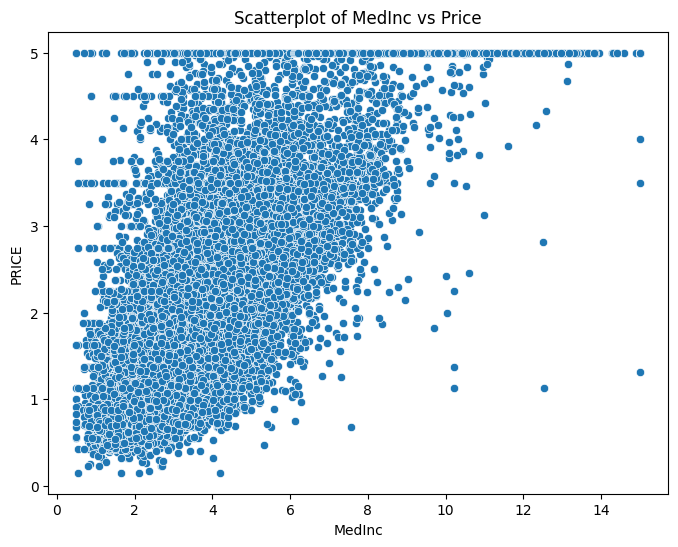

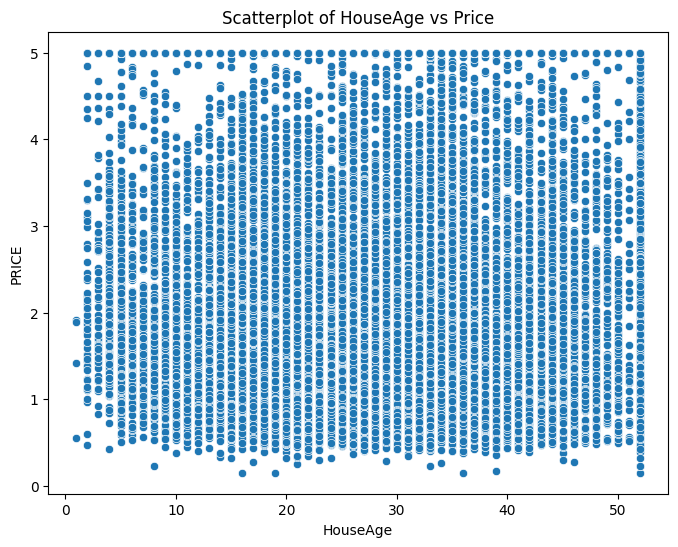

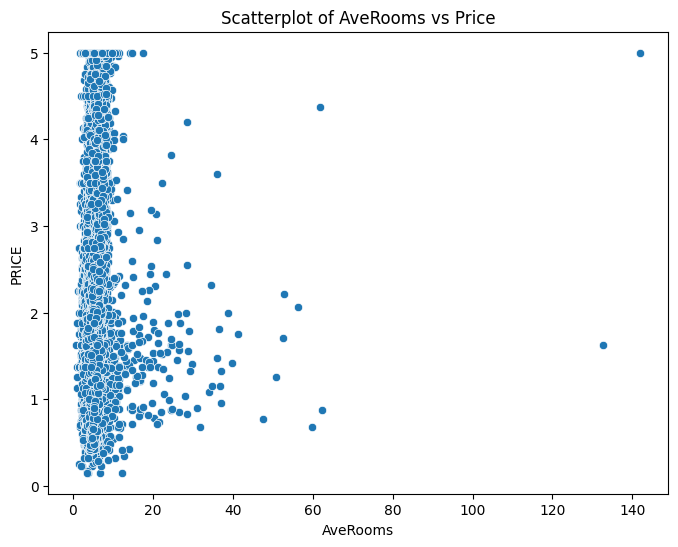

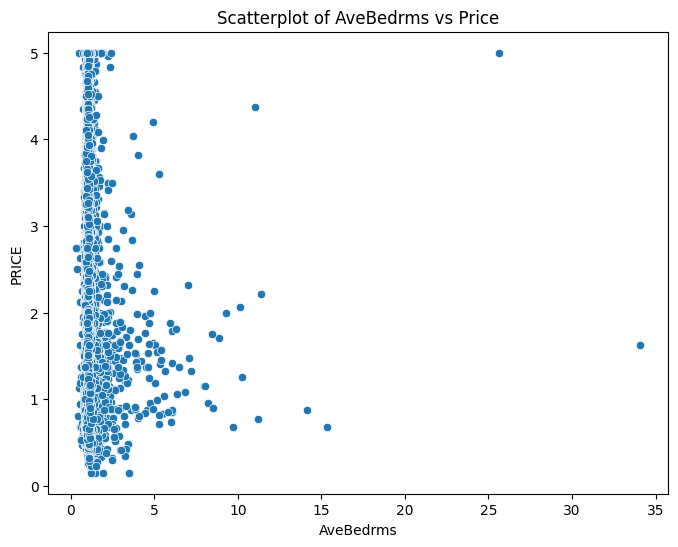

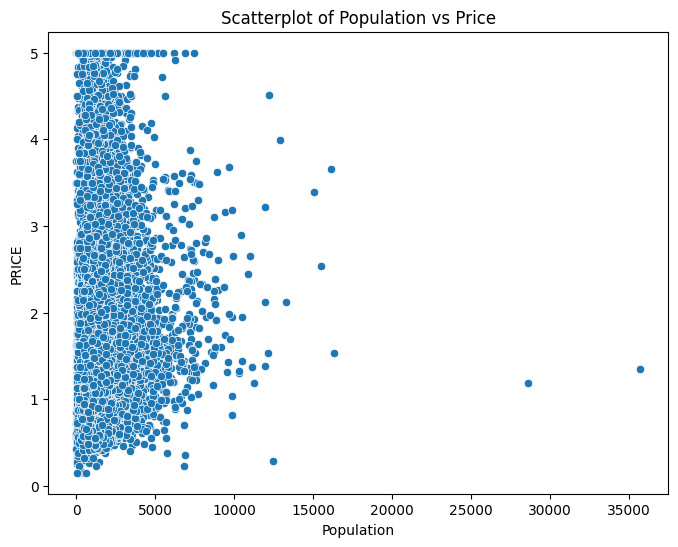

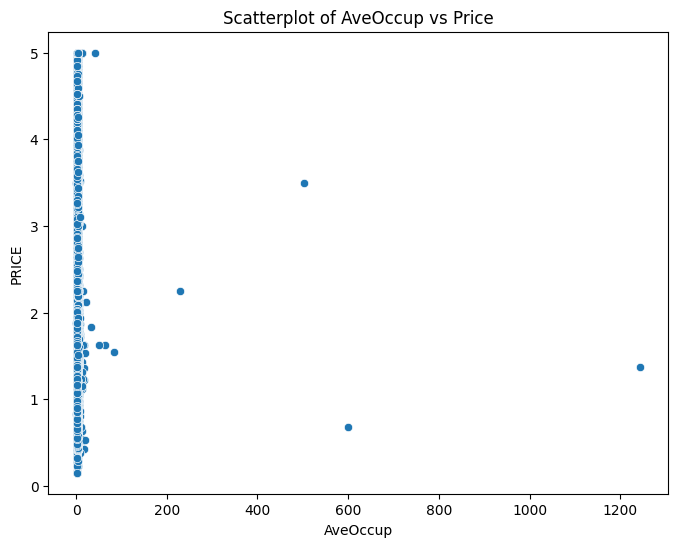

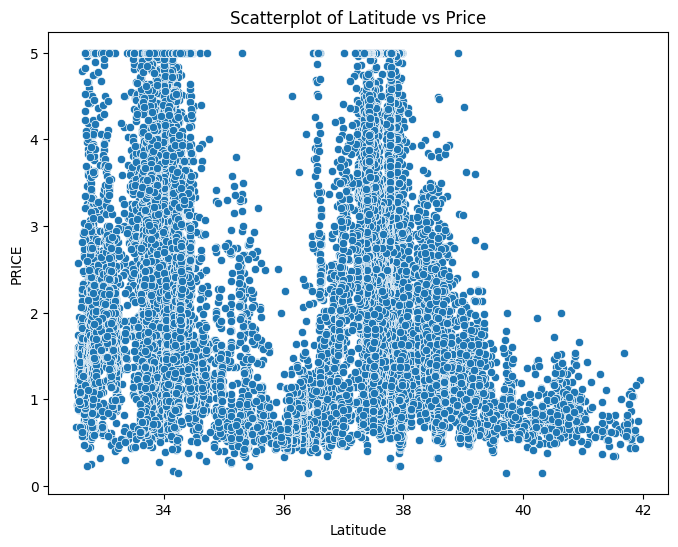

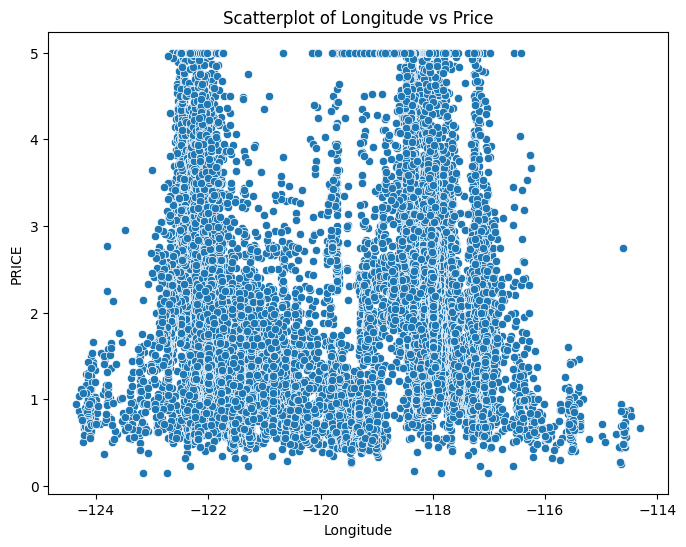

In [8]:
#plot price vs other features

for col in df.columns[:-1]:
  plt.figure(figsize=(8, 6))
  sns.scatterplot(x=df[col], y=df['PRICE'])
  plt.title(f'Scatterplot of {col} vs Price')
  plt.show

It seems only price and median income have a linear relationship. There is an interesting trend in price vs avg rooms and avg bedrooms. It seems their are expensive and not so expensive houses with not that many bedrooms/rooms

In [9]:
#step 4: Feature engineering

#create AGE_CATEGORY
df['AGE_CATEGORY'] = pd.qcut(df['HouseAge'], q=4, labels=['New', 'Medium', 'Old', 'Very Old'])

#check for missing values
print(df['AGE_CATEGORY'].value_counts().sum())

#check df
print(df.head())

20640
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE AGE_CATEGORY  
0    -122.23  4.526     Very Old  
1    -122.22  3.585       Medium  
2    -122.24  3.521     Very Old  
3    -122.25  3.413     Very Old  
4    -122.25  3.422     Very Old  


In [10]:
import geopandas as gpd

In [11]:
#step4 cont

#create a countys category

url = "https://github.com/ewu22gmu/Test_Photo1_CDS468/raw/refs/heads/main/ca_counties.zip"
california_counties = gpd.read_file(url)
print(california_counties.shape) #check shape
print(california_counties.columns) #check for feature names

T_missing = california_counties.isnull().sum().sum()
print('has missing values' if T_missing == 0 else 'No missing values') #check for missing values

print(california_counties.head()) #check df

#drop columns
'''keep = ['NAMELSAD', 'geometry']
california_counties = california_counties[keep]'''

cali_crs = california_counties.crs #get spatial mapping crs from califonia counties

(58, 20)
Index(['STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME', 'NAMELSAD', 'LSAD',
       'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP', 'FUNCSTAT', 'ALAND',
       'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')
No missing values
  STATEFP COUNTYFP  COUNTYNS  GEOID           NAME              NAMELSAD LSAD  \
0      06      091  00277310  06091         Sierra         Sierra County   06   
1      06      067  00277298  06067     Sacramento     Sacramento County   06   
2      06      083  00277306  06083  Santa Barbara  Santa Barbara County   06   
3      06      009  01675885  06009      Calaveras      Calaveras County   06   
4      06      111  00277320  06111        Ventura        Ventura County   06   

  CLASSFP  MTFCC CSAFP CBSAFP METDIVFP FUNCSTAT         ALAND        AWATER  \
0      H1  G4020  None   None     None        A  2.468695e+09  2.329911e+07   
1      H1  G4020   472  40900     None        A  2.499984e+

In [12]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']), crs='EPSG:4326') #project housing data to spatial mapping
gdf = gdf.to_crs('EPSG:3857')  #reproject to EPSG:3857
gdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,AGE_CATEGORY,geometry
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Very Old,POINT (-13606581.36 4562487.679)
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Medium,POINT (-13605468.165 4559667.342)
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Very Old,POINT (-13607694.555 4558257.461)
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Very Old,POINT (-13608807.749 4558257.461)
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Very Old,POINT (-13608807.749 4558257.461)


In [13]:
df_with_regions = gpd.sjoin(gdf, california_counties, how="left", predicate='within') #join housing data with spatial data
df_with_regions.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE,AGE_CATEGORY,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,Medium,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,Very Old,...,488,41860,36084,A,1.909615e+09,216907015.0,+37.6471385,-121.9124880,309844.135329,3.398123e+09


In [14]:
'''df_with_regions.drop(columns=['index_right', 'geometry'], inplace=True) #drop vestigial columns from join
df_with_regions.head()'''

"df_with_regions.drop(columns=['index_right', 'geometry'], inplace=True) #drop vestigial columns from join\ndf_with_regions.head()"

In [15]:
#sanity check
cat_cols = df_with_regions.select_dtypes(include=['object', 'category']).columns #get categorical columns
print(cat_cols) #check categorical columns

#summary stats for categorical variables

print(df_with_regions.describe(include='object')) #get summary stats for categorical variables

Index(['AGE_CATEGORY', 'STATEFP', 'COUNTYFP', 'COUNTYNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'INTPTLAT', 'INTPTLON'],
      dtype='object')
       STATEFP COUNTYFP  COUNTYNS  GEOID         NAME            NAMELSAD  \
count    20637    20637     20637  20637        20637               20637   
unique       1       58        58     58           58                  58   
top         06      037  00277283  06037  Los Angeles  Los Angeles County   
freq     20637     5824      5824   5824         5824                5824   

         LSAD CLASSFP  MTFCC  CSAFP CBSAFP METDIVFP FUNCSTAT     INTPTLAT  \
count   20637   20637  20637  16816  20366    10244    20637        20637   
unique      1       2      1      5     34        5        2           58   
top        06      H1  G4020    348  31080    31084        A  +34.1963983   
freq    20637   20062  20637   9245   7442     5824    20062         5824   

         

In [16]:
print(df_with_regions['NAMELSAD'].value_counts()) #get value counts for each county

NAMELSAD
Los Angeles County        5824
Orange County             1618
San Diego County          1609
Alameda County            1017
Santa Clara County        1003
San Bernardino County      831
Sacramento County          688
Contra Costa County        597
Riverside County           588
San Francisco County       575
Fresno County              525
San Mateo County           447
San Joaquin County         419
Ventura County             384
Kern County                370
Sonoma County              313
Santa Barbara County       307
Stanislaus County          303
Tulare County              258
Monterey County            202
Solano County              199
Santa Cruz County          191
Marin County               166
Butte County               156
San Luis Obispo County     139
Placer County              132
Merced County              128
Humboldt County            127
Shasta County              121
El Dorado County           120
Imperial County            118
Napa County                103

In [17]:
#step 5 Data preprocessing

# Separate features and target

# Split the data

# Scale the features

I electied to skip this step since it doesn't appear that we are making predictions yet.

In [18]:
#1. Calculate and visualize the average house price by AGE_CATEGORY

#print(df.head())

avg_price_by_age_category = df.groupby('AGE_CATEGORY')['PRICE'].mean()
print(avg_price_by_age_category)

AGE_CATEGORY
New         1.932760
Medium      2.051372
Old         2.067795
Very Old    2.234164
Name: PRICE, dtype: float64


<ipython-input-18-5214d751af18>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_age_category = df.groupby('AGE_CATEGORY')['PRICE'].mean()


In [19]:
#find populations of counties
population_by_county = df_with_regions.groupby('NAMELSAD')['Population'].sum()
print(population_by_county.sort_values(ascending=False)[:5]) #top 5 counties by population

print(f'Total population {population_by_county.sum()}') #total population

NAMELSAD
Los Angeles County       8779957.0
San Diego County         2446180.0
Orange County            2369778.0
Santa Clara County       1485976.0
San Bernardino County    1409740.0
Name: Population, dtype: float64
Total population 29420103.0


In [20]:
#try to get county size to get county population/county area for density

california_counties2 = california_counties.copy()
california_counties2 = california_counties2.to_crs("EPSG:2163") #change to american units projected
california_counties2['area_projected'] = california_counties2.geometry.area #find area of geometry feature

SQ_M_TO_SQ_MI = 0.000000386102 #unit conversion

california_counties2['area_projected_sqmi'] = california_counties2['area_projected'] * SQ_M_TO_SQ_MI #convert projected area to sqmi

california_counties2.drop(columns=['area_projected'], inplace=True) #drop area_projected column

In [21]:
population_by_county = df_with_regions.groupby('NAMELSAD')['Population'].sum()

california_counties2['Population'] = california_counties2['NAMELSAD'].map(population_by_county) #add population column
california_counties2['Population_Density'] = california_counties2['Population'] / california_counties2['area_projected_sqmi'] #add population density column

In [22]:
print(california_counties2[['NAME','Population_Density']].sort_values(by='Population_Density', ascending=False)[:5]) #view population density of the top 5

             NAME  Population_Density
10  San Francisco         3031.088815
47         Orange         2498.886519
5     Los Angeles         1847.527476
41        Alameda         1529.978457
38    Santa Clara         1139.995338


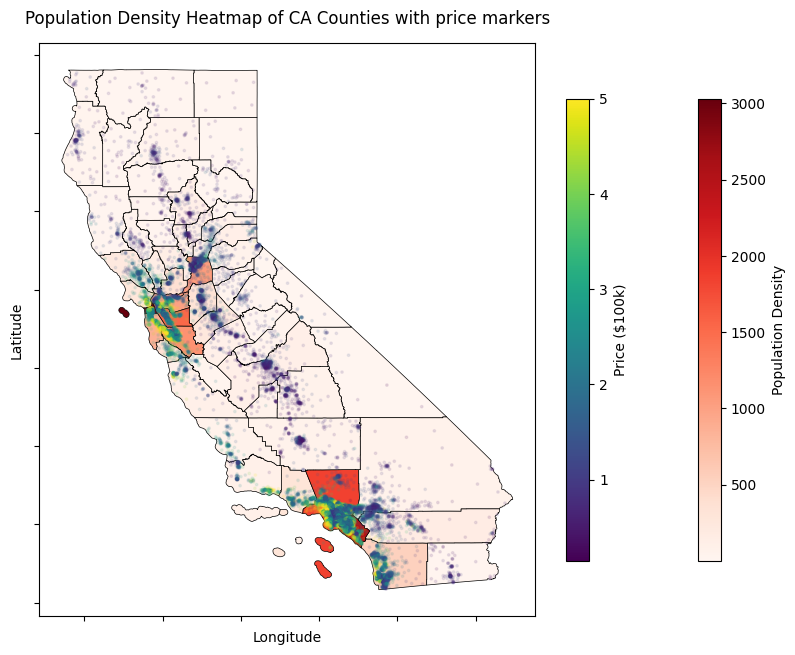

In [77]:
#visualize prices against county lines

california_counties2 = california_counties2.to_crs("EPSG:3857") #change to american units projected

fig, ax = plt.subplots(1, 1, figsize=(10, 8))  # Adjust figure size if needed

#plot counties with color based on population density
california_counties2.plot(ax=ax,
                          column='Population_Density',
                          cmap='Reds',
                          edgecolor='black',
                          linewidth=0.5,
                          legend=True,
                          legend_kwds={'label': "Population Density", 'shrink': 0.75}
                          )

#label plot
ax.set_title("Population Density Heatmap of CA Counties with price markers", y=1.02)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.set_xticklabels([])
ax.set_yticklabels([])

#overlay price data
df_with_regions.plot(ax=ax,
                     column='PRICE',
                     cmap='viridis',
                     marker='o',
                     markersize=3,
                     alpha=0.1,
                     label='Price',
                     legend=True,
                     legend_kwds={'label': "Price ($100k)", 'shrink': 0.75}
                     )

#create colorbars
colorbar = fig.get_figure().axes[1]
plt.show()